In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE=[224,224]
train_path='cell_images/train'
valid_path='cell_images/test'

In [4]:
folders=glob('cell_images/train/*')

In [5]:
folders

['cell_images/train\\Parasitized', 'cell_images/train\\Uninfected']

In [6]:
from tensorflow.keras.layers import MaxPooling2D

In [7]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

In [8]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
train_data=ImageDataGenerator(rescale=1./255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True
                             )
test_data=ImageDataGenerator(rescale=1./255)

In [10]:
training_set=train_data.flow_from_directory('cell_images/train',
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode='categorical')

Found 1896 images belonging to 2 classes.


In [11]:
test_set=test_data.flow_from_directory('cell_images/test',
                                      target_size=(224,224),
                                      batch_size=32,
                                      class_mode='categorical')

Found 1542 images belonging to 2 classes.


In [12]:
training_set

In [13]:
test_set

In [14]:
r= model.fit_generator(training_set,validation_data=test_set,epochs=50,steps_per_epoch=len(training_set),validation_steps=len(test_set))

c:\users\om22r\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
60/60 [==============================] - 35s 353ms/step - loss: 0.9001 - accuracy: 0.5923 - val_loss: 0.9240 - val_accuracy: 0.5986
Epoch 2/50
60/60 [==============================] - 20s 327ms/step - loss: 0.5542 - accuracy: 0.6994 - val_loss: 0.8365 - val_accuracy: 0.5934
Epoch 3/50
60/60 [==============================] - 18s 303ms/step - loss: 0.5504 - accuracy: 0.6909 - val_loss: 0.7944 - val_accuracy: 0.6070
Epoch 4/50
60/60 [==============================] - 18s 302ms/step - loss: 0.5192 - accuracy: 0.7215 - val_loss: 1.0457 - val_accuracy: 0.6012
Epoch 5/50
60/60 [==============================] - 18s 306ms/step - loss: 0.5020 - accuracy: 0.7395 - val_loss: 0.7834 - val_accuracy: 0.6096
Epoch 6/50
60/60 [==============================] - 18s 307ms/step - loss: 0.4867 - accuracy: 0.7532 - val_loss: 0.9006 - val_accuracy: 0.5921
Epoch 7/50
60/60 [==============================] - 18s 300ms/step - loss: 0.3846 - accuracy: 0.8291 - val_loss: 0.5324 - val_accuracy: 0.6809

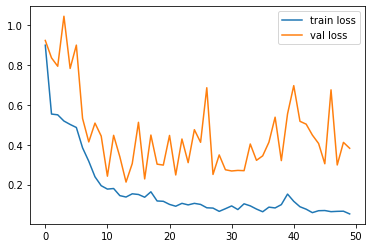

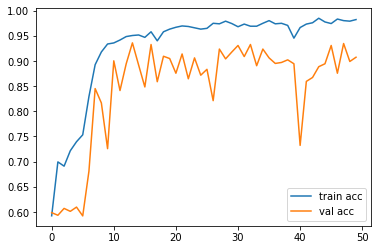

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
from tensorflow.keras.models import load_model

model.save('model_scratch.h5')